In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings

In [2]:
# matplotlib参数设置
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
warnings.filterwarnings('ignore')
# 设定了单例RandomState实例的种子
np.random.seed(42)

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', parser='auto')
X = mnist['data'].values
y = mnist['target'].values.codes
print(X.shape, y.shape)

(70000, 784) (70000,)


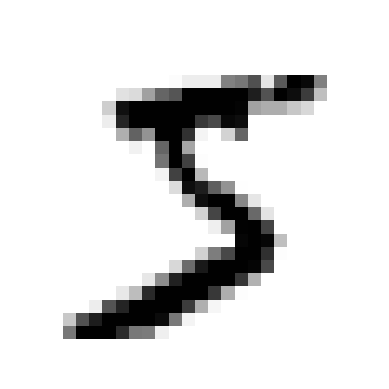

In [4]:
# 展示第一个样本
x_0 = X[0, :].reshape(28, 28)
plt.imshow(x_0, cmap="gray_r")
plt.axis('off')
plt.show()

In [5]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [6]:
# 数据洗牌
# permutation随机排列序列
shuffle_index = np.random.permutation(60000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

预测的值： [4] 实际的值： 4


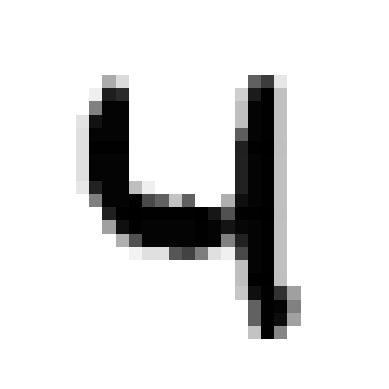

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train)

# 进行预测并展示
y_pred_0 = sgd_clf.predict([X_test[3500]])
print("预测的值：", y_pred_0, "实际的值：", y_test[3500])
x_3500 = X_test[3500].reshape(28, 28)
plt.imshow(x_3500, cmap="gray_r")
plt.axis('off')
plt.show()

In [13]:
# 用sklearn自带的交叉验证函数
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring='accuracy')
print(cross_score)

[0.85408333 0.869      0.8705     0.87508333 0.86325   ]


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# 手动分块进行交叉验证
sk_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in sk_folds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_val_folds = X_train[val_index]
    y_val_folds = y_train[val_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_val_folds)
    n_correct = sum(y_pred == y_val_folds)
    print(n_correct/len(y_pred))

0.8685
0.866
0.8678333333333333
0.8575833333333334
0.8541666666666666


In [8]:
# 混淆矩阵
from sklearn.model_selection import cross_val_predict

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)
from sklearn.metrics import confusion_matrix
y_confusion_matrix = confusion_matrix(y_train, y_train_pred, labels=labels)
print(y_confusion_matrix)

[[5703    0   32   24   18   14   31    9   78   14]
 [   5 6287   56   29   13   29   13   15  257   38]
 [ 107   40 5071  146   81   10   70   87  303   43]
 [  68   16  116 5381   19   78   28   72  277   76]
 [  29   15   46   16 5197   18   28   38  159  296]
 [ 183   20   53  503  120 3675  132   35  607   93]
 [  77   12  172   13   69   70 5411   14   62   18]
 [  30   10   42   45   76    7    3 5736   51  265]
 [  89   75   70  253   78  126   36   33 4967  124]
 [  64   10   31  119  310   44    5  546  265 4555]]


In [9]:
# 评估指标计算
TP = y_confusion_matrix.diagonal()
TN = TP.sum() - TP
FP = y_confusion_matrix.sum(axis=0) - TP
FN = y_confusion_matrix.sum(axis=1) - TP

# 准确率
Acc = TP.sum() / y_confusion_matrix.sum()
print("Accuracy:", Acc)

import pandas as pd
# 精确率
Ppv = TP / (TP + FP)
# 召回率
Tpr = TP / (TP + FN)
# 特异度
Tnr = TN / (TN + FP)
# F1 得分
F1 = TP / (TP + (FN + FP) / 2)
df = pd.DataFrame({'Precision': Ppv, 'Recall': Tpr, 'Specificity': Tnr, 'F1 score': F1}, index=labels)
print(df)

Accuracy: 0.8663833333333333
   Precision    Recall  Specificity  F1 score
0   0.897404  0.962857     0.986108  0.928979
1   0.969468  0.932513     0.995686  0.950631
2   0.891369  0.851125     0.986998  0.870782
3   0.824169  0.877671     0.975958  0.850079
4   0.868918  0.889593     0.983519  0.879134
5   0.902727  0.677919     0.991869  0.774336
6   0.939899  0.914329     0.992625  0.926938
7   0.871071  0.915563     0.981973  0.892763
8   0.706946  0.848915     0.958044  0.771453
9   0.824882  0.765675     0.980019  0.794177


In [18]:
y_pred_scores_0 = sgd_clf.decision_function([X_test[3500]])
print(y_pred_scores_0)

[[-540392.54574042 -641368.91760079 -377434.77316698 -601620.83559672
   375478.77859761 -344132.55989475 -216771.09254431 -450552.7519617
   -35134.21078551  -91892.08150778]]


In [ ]:
y_train_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=5, 
                                    method="decision_function")

In [19]:
y_train_scores = sgd_clf.decision_function(X_train)

In [25]:
from sklearn.preprocessing import label_binarize

y_train_one_hot = label_binarize(y_train, classes=labels)
print(y_train[0], "--->", y_train_one_hot[0])

7 ---> [0 0 0 0 0 0 0 1 0 0]


In [21]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_one_hot.ravel(), y_train_scores.ravel())

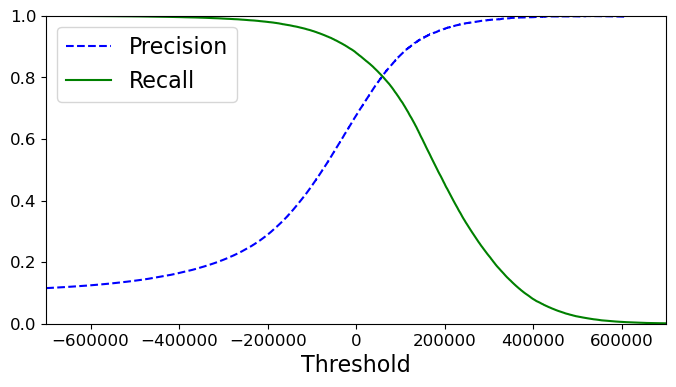

In [22]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()